In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score,roc_curve
from sklearn.cluster import KMeans
import time
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MBAN 6110 S - Data Science I/sales_data.csv')

In [3]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [5]:
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [6]:
df['Product'] = df['Product'].fillna('Other')

In [7]:
df['Region'] = df['Region'].fillna('Other')

In [8]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [9]:
df['Units Sold'] = df['Price'].fillna(df['Price'].mean())

In [10]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     1050 non-null   object        
 1   Region      1050 non-null   object        
 2   Price       1050 non-null   float64       
 3   Units Sold  1050 non-null   float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


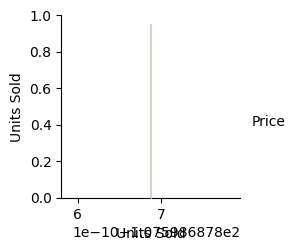

In [12]:
sns.pairplot(df, hue = 'Price')